# Abstract
## Twitter
***
Twitter is an American microblogging and social networking service on which users post and interact with messages known as "tweets". Users can be registrar around the world and post, like, and retweet tweets, but unregistered users can only read them.Users access Twitter through its website interface, through Short Message Service (SMS) or its mobile-device application software ("app"). The Initial public offering (IPO) filing states that "200,000,000+ monthly active users" access Twitter and "500,000,000+ tweets per day" are posted.The service rapidly gained worldwide popularity, reaching more than 321 million users in 2018. Proving to be a fruitful database of information, for behavioral analysis, trends and etc.
###### Adapted from https://en.wikipedia.org/wiki/Twitter
***
### Problem Statement

In front, this pandemic situation in 2020, was emerging a movement around the hashtags and messages using the motivation words "stay home" and "stayhome". To understand the place in the world most engaged in this movement, we decided to select the tweets that contain these two keywords ("stayhome" and "stay home") and, from these tweets, select the country and account for the recurrence of this words.

Connect to the twitter API and collect a small dataset for treatment.

This project has as the main goal exercise the:
* collect the tweets filtered by a specific keywords "stay home" and "stay home"
* create a database on MongoDB to store these tweets
* understand the tweets data structure and isolate the "country" information present in the post
* perform a data cleaning on the collect tweets eliminating the emoji and non-alphanumeric symbols
* count the countries that have the selected keywords in their tweets

### Aproach
This project was carried out with a small set of data (collecter durring Fri May 08 **10:32:02** +0000 2020 - Fri May 08 **10:36:59** +0000 2020), for computational performance reasons being only an illustrative analysis. In this data analysis, the most important is the valorization of the strategies and tools used to achieve the main objectives. The procedure will be implemented in the Python library tweepy, pymongo, pandas, numpy, matplotlib, seaborn and sklearn.

The basic outline is as follows:
*  perform a tweet data cleaning and organization
*  extrarcted the country location posted on tweet
*  account the number of keywords oer country




# 1. Establishing Twitter connection

In [486]:
# Importing Tweepy, Datetime and Json modules

from tweepy.streaming import StreamListener # read the twitts
from tweepy import OAuthHandler # allows twitter authentication
from tweepy import Stream # work with continuous data (social medias)
from datetime import datetime
import json

In [ ]:
# Add your Consumer Key here
consumer_key = "API consumer_key"

In [ ]:
# Add your Consumer Secret here
consumer_secret = "API consumer_secret "

In [ ]:
# Add your Access Token here
access_token = "API access_token"

In [ ]:
# Add your Access Token Secret here
access_token_secret = "API access_token_secret"

## 1.1 Definition of authentication with twitter API

In [ ]:
# Creating the authentication keys
auth = OAuthHandler(consumer_key, consumer_secret)

In [ ]:
auth.set_access_token(access_token, access_token_secret)

# 2. Creating a *Class* to capture Twitter data streams and store in MongoDB

In [ ]:
import time

In [ ]:

class Mylistener(StreamListener):
    def on_data(self, data):
        runtime = 60
        tweet = json.loads(data)
        created_at = tweet["created_at"]       
        id_str = tweet["id_str"]
        place_id = tweet["user"]["location"]
        text = tweet["text"]
        obj = {"created_at":created_at, "id_str":id_str,"place_id":place_id , "text": text}
        tweetind = col.insert_one(obj).inserted_id #Insertion into MongoDB
        print(obj)
        
        
        
        

In [ ]:
mylistener = Mylistener()

In [ ]:
#giving the credentitial athentication to Twitter

mystream = Stream(auth, listener=mylistener) 
#Stream(authentication keys, the object that provides the information that should be collected)

# 3. Preparing to Connect to MongoDB

In [487]:
# Importing the MongoClient module from PyMongo
from pymongo import MongoClient

In [488]:
# MongoDB have to be initialized before this section
# Creating the connection to MongoDB
client = MongoClient('localhost', 27017)

In [489]:
# Creating the twitter_locationdb database| the twitter_location is the BD name!
db = client.twitter_locationdb

In [490]:
# Creating the collection "col" | MongoDB "Table"
col = db.twetts

In [491]:
keywords = ["stayhome", "stay home"]

# 4. Tweets collection

In [ ]:
# Starting the filter and recording the tweets in MongoDB
mystream.filter(track=keywords)

## 4.1  Querying the data in MongoDB

In [ ]:
#Disconect from Twitter
mystream.disconnect()

In [485]:
# Checking a document in the collection 
col.find_one()

{'_id': ObjectId('5eb53526e9a44f0964ce3375'),
 'created_at': 'Fri May 08 10:32:02 +0000 2020',
 'id_str': '1258706217892868096',
 'place_id': '🍯＜ﾗｳﾗｳ!!(鳴き声)',
 'text': '帰宅！\nすのとStayHomeだ〜✨✨\n自担の自炊が見られる…ラウちゃんはお母さんと作ったやつかな(((o( ˙꒳\u200b˙ )o)))\n\nさっくん揚げ物出来るの偉いよ！とんかつ食べたくなる🤣🤣'}

# 5. Data Analysis with Pandas and Scikit-Learn
 


In [ ]:
# Creating a dataset with data returned from MongoDB
dataset = [{"created_at": item["created_at"], "place_id": item["place_id"], "text": item["text"]} for item in col.find()]

In [492]:
import pandas as pd
pd.__version__

'0.23.4'

In [493]:
df = pd.DataFrame(dataset)

In [494]:
df


,created_at,place_id,text
0,Fri May 08 10:32:02 +0000 2020,🍯＜ﾗｳﾗｳ!!(鳴き声),帰宅！\nすのとStayHomeだ〜✨✨\n自担の自炊が見られる…ラウちゃんはお母さんと作っ...
1,Fri May 08 10:33:56 +0000 2020,None,RT @sakanaction: デビュー10周年記念イベントの配信に先駆けて、19時から「...
2,Fri May 08 10:34:18 +0000 2020,EXO•X1•ATEEZ•NCT,RT @superm: #StayHomeWithSuperM Project \n\n#3...
3,Fri May 08 10:34:18 +0000 2020,None,RT @superm: #StayHomeWithSuperM Project \n\n#3...
4,Fri May 08 10:34:18 +0000 2020,None,RT @onnanoko_kirai: 🍓お知らせ🍓\n『おんなのこきらい』5周年ということ...
5,Fri May 08 10:34:18 +0000 2020,India,खौफ में दिल्ली: एक साथ 45 एम्बुलेंस कर्मचारी स...
6,Fri May 08 10:34:18 +0000 2020,None,RT @KBSWorldTV: #StayHome &amp; enjoy Kpop #Mu...
7,Fri May 08 10:34:18 +0000 2020,None,RT @Japan_Olympic: フィギュアスケートの羽生結弦選手からのメッセージです（...
8,Fri May 08 10:34:19 +0000 2020,None,「星になった少年」\n2005年なんだ、懐かしい…。象は好き。いつかもう一度観る機会があると...
9,Fri May 08 10:34:19 +0000 2020,"North West, England",Too true. Stay home &amp; save lives. It's rea...


In [495]:
# Importing the Scikit Learn module

from sklearn.feature_extraction.text import CountVectorizer

In [496]:
import sklearn
sklearn.__version__

'0.19.2'

In [497]:
# Using the CountVectorizer method to create an array of documents
cv = CountVectorizer()
count_matrix = cv.fit_transform(df.text)


In [498]:
# Counting the number of occurrences of the main words in our dataset

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]



,word,count
0,rt,1463
1,https,1017
2,co,944
3,stayhome,491
4,stay,344
5,the,343
6,home,291
7,to,265
8,we,184
9,of,164


# 6. Data analisys - exploring the DB
df = 1824 rows × 3 columns

# # On this secction we will explore the data
* Cleaning the NONE values; 
* Clening the Emoji from place_id columns

In [446]:
df_1 = df
df_1.head()

,created_at,place_id,text
0,Fri May 08 10:32:02 +0000 2020,🍯＜ﾗｳﾗｳ!!(鳴き声),帰宅！\nすのとStayHomeだ〜✨✨\n自担の自炊が見られる…ラウちゃんはお母さんと作っ...
1,Fri May 08 10:33:56 +0000 2020,None,RT @sakanaction: デビュー10周年記念イベントの配信に先駆けて、19時から「...
2,Fri May 08 10:34:18 +0000 2020,EXO•X1•ATEEZ•NCT,RT @superm: #StayHomeWithSuperM Project \n\n#3...
3,Fri May 08 10:34:18 +0000 2020,None,RT @superm: #StayHomeWithSuperM Project \n\n#3...
4,Fri May 08 10:34:18 +0000 2020,None,RT @onnanoko_kirai: 🍓お知らせ🍓\n『おんなのこきらい』5周年ということ...


In [447]:
df_1['place_id'].describe()

count     1066
unique     869
top         日本
freq        23
Name: place_id, dtype: object

In [448]:
df_1['place_id'].unique()

array(['🍯＜ﾗｳﾗｳ!!(鳴き声)', None, 'EXO•X1•ATEEZ•NCT', 'India',
       'North West, England', '坂', 'nn flora', 'England, United Kingdom',
       'IBARAKI', 'ประเทศไทย', '男鹿アキタの出身地', 'Aberdeen, Scotland',
       '富山 富山市', 'Marvel DC', 'Lagos, Nigeria', 'Chiba, Japan', '横濱',
       '♨️蔵王でスノボして温泉に浸かりたい', 'Susquehanna Valley ,USA', 'Raymond, ME',
       'Amethi, India', 'オーストラリア県 （秩父？）（川越）', '欲しいものﾘｽﾄ📝➤➤➤', '日本 広島',
       '懸賞垢さんフォロバ100🌿敬語ポイで仲良くしてね♡⃛', '緑の箱', '東京都渋谷区', 'United States fl',
       '35.963139,-80.464812', '大阪', 'あげものフレンズ', 'USA',
       'Cebu City, Philippines', 'Republic of the Philippines', 'ニッポン',
       '東京のドトール', '無言フォロー失礼します💦', '日本', 'Abuja, Nigeria', 'Nigeria',
       'New Delhi, India', 'Mississippi', 'Virginia', '宇宙回転温泉', '中野GLAY部',
       'Belong to ELLA DAPE RIIP (NIT)', '山姥切長義くんが幸せな世界線', '愛媛県',
       'Stockport', '𝟵𝟳 / 𝘁𝗼𝗸𝘆𝗼', 'Poinciana, FL', '立川市', '대한민국 서울',
       'Portland, OR', 'United States', 'Ara varu teia',
       '毎週月曜日20:00 SHOWROOM', 'キャッスルロック', '오소리 D구역 

In [451]:
# This part we'll select only the NONE values and see how much we have.

df_1[df_1['place_id'].isna()]

,created_at,place_id,text
1,Fri May 08 10:33:56 +0000 2020,None,RT @sakanaction: デビュー10周年記念イベントの配信に先駆けて、19時から「...
3,Fri May 08 10:34:18 +0000 2020,None,RT @superm: #StayHomeWithSuperM Project \n\n#3...
4,Fri May 08 10:34:18 +0000 2020,None,RT @onnanoko_kirai: 🍓お知らせ🍓\n『おんなのこきらい』5周年ということ...
6,Fri May 08 10:34:18 +0000 2020,None,RT @KBSWorldTV: #StayHome &amp; enjoy Kpop #Mu...
7,Fri May 08 10:34:18 +0000 2020,None,RT @Japan_Olympic: フィギュアスケートの羽生結弦選手からのメッセージです（...
8,Fri May 08 10:34:19 +0000 2020,None,「星になった少年」\n2005年なんだ、懐かしい…。象は好き。いつかもう一度観る機会があると...
12,Fri May 08 10:34:19 +0000 2020,None,RT @nanaon_official: 【事前登録者数22.7万人突破🎉】\nこちらを記念...
15,Fri May 08 10:34:19 +0000 2020,None,RT @ikeda_kaede48: 写真かと思ったら動画だったので、とびっきりはしゃいだ池...
16,Fri May 08 10:34:19 +0000 2020,None,RT @eiga_watamote: 🏠#おうちでモテてどうすんだ 💘\n\n#神尾楓珠 さ...
17,Fri May 08 10:34:19 +0000 2020,None,RT @nozomi_s_LI2U: ｢いつもは漫画ばかり読んでいる彼女だが、テレワークを始...


In [452]:
## This part we'll Exclude the NONE values and see how much we have.
df_1['place_id'].dropna()

0                    🍯＜ﾗｳﾗｳ!!(鳴き声)
2                 EXO•X1•ATEEZ•NCT
5                            India
9              North West, England
10                               坂
11                        nn flora
13         England, United Kingdom
14                         IBARAKI
23                       ประเทศไทย
24                       男鹿アキタの出身地
26              Aberdeen, Scotland
29                          富山 富山市
30                       Marvel DC
33                  Lagos, Nigeria
35                    Chiba, Japan
36                              横濱
37              ♨️蔵王でスノボして温泉に浸かりたい
38         Susquehanna Valley ,USA
39                     Raymond, ME
40                   Amethi, India
41              オーストラリア県 （秩父？）（川越）
42                    欲しいものﾘｽﾄ📝➤➤➤
44                           日本 広島
45      懸賞垢さんフォロバ100🌿敬語ポイで仲良くしてね♡⃛
49                             緑の箱
50                          東京都渋谷区
51                United States fl
52            35.963139,-80.464812
53                  

In [453]:
# Drop NONE based on the 'place_id' column
df_2_dropnone = df_1.dropna(subset=['place_id'])
df_2_dropnone

,created_at,place_id,text
0,Fri May 08 10:32:02 +0000 2020,🍯＜ﾗｳﾗｳ!!(鳴き声),帰宅！\nすのとStayHomeだ〜✨✨\n自担の自炊が見られる…ラウちゃんはお母さんと作っ...
2,Fri May 08 10:34:18 +0000 2020,EXO•X1•ATEEZ•NCT,RT @superm: #StayHomeWithSuperM Project \n\n#3...
5,Fri May 08 10:34:18 +0000 2020,India,खौफ में दिल्ली: एक साथ 45 एम्बुलेंस कर्मचारी स...
9,Fri May 08 10:34:19 +0000 2020,"North West, England",Too true. Stay home &amp; save lives. It's rea...
10,Fri May 08 10:34:19 +0000 2020,坂,RT @PorscheJP: Porsche Driving Athleteである南野拓実選...
11,Fri May 08 10:34:19 +0000 2020,nn flora,RT @miguel_fnd: Bcp trop chaud 👏🏼
13,Fri May 08 10:34:19 +0000 2020,"England, United Kingdom","RT @KatharineEdwrds: VE family day in Hilton, ..."
14,Fri May 08 10:34:19 +0000 2020,IBARAKI,(ᐡ o̴̶̷᷄ ̫ o̴̶̷̥᷅ ᐡ)💗💗💗
23,Fri May 08 10:34:20 +0000 2020,ประเทศไทย,RT @superm: #StayHomeWithSuperM Project \n\n#3...
24,Fri May 08 10:34:20 +0000 2020,男鹿アキタの出身地,RT @BF_Ace: 金曜日だー‼️21時からパラパラキャスやるよ！踊って喋っての60分！...


In [454]:
df_2_dropnone.count()

created_at    1066
place_id      1066
text          1066
dtype: int64

## Partial conclusions


* On the 'place_id' column we can identify some countries
* Is necessary cleaning the Emoji on the 'place_id' column to be able to isolate the Teet country
* Until this part, we guarantee that the NONE values were dropped by the 'place_id' column (keppeing 1066 rows)

## 6.1 Process to remove Emoji and non-alphanumeric letters ('Chinese style words')

In [455]:
# for fututure try https://pypi.org/project/demoji/
# Remove emoji , removed from: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

# Didn't work to all kind of emoji

import re
import sys
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [456]:
place_id_dropemoji = list(map(lambda x: remove_emoji(x), df_2_dropnone['place_id']))

In [457]:
type(place_id_dropemoji)

list

In [458]:
df_3_drop_emoji = df_2_dropnone
df_3_drop_emoji.insert(1, 'place_id_dropEmoji', place_id_dropemoji)


In [459]:
# Didn't have any change in the number of elements
df_3_drop_emoji.count()

created_at            1066
place_id_dropEmoji    1066
place_id              1066
text                  1066
dtype: int64

In [460]:
df_3_drop_emoji.head(10)

,created_at,place_id_dropEmoji,place_id,text
0,Fri May 08 10:32:02 +0000 2020,!!(),🍯＜ﾗｳﾗｳ!!(鳴き声),帰宅！\nすのとStayHomeだ〜✨✨\n自担の自炊が見られる…ラウちゃんはお母さんと作っ...
2,Fri May 08 10:34:18 +0000 2020,EXO•X1•ATEEZ•NCT,EXO•X1•ATEEZ•NCT,RT @superm: #StayHomeWithSuperM Project \n\n#3...
5,Fri May 08 10:34:18 +0000 2020,India,India,खौफ में दिल्ली: एक साथ 45 एम्बुलेंस कर्मचारी स...
9,Fri May 08 10:34:19 +0000 2020,"North West, England","North West, England",Too true. Stay home &amp; save lives. It's rea...
10,Fri May 08 10:34:19 +0000 2020,,坂,RT @PorscheJP: Porsche Driving Athleteである南野拓実選...
11,Fri May 08 10:34:19 +0000 2020,nn flora,nn flora,RT @miguel_fnd: Bcp trop chaud 👏🏼
13,Fri May 08 10:34:19 +0000 2020,"England, United Kingdom","England, United Kingdom","RT @KatharineEdwrds: VE family day in Hilton, ..."
14,Fri May 08 10:34:19 +0000 2020,IBARAKI,IBARAKI,(ᐡ o̴̶̷᷄ ̫ o̴̶̷̥᷅ ᐡ)💗💗💗
23,Fri May 08 10:34:20 +0000 2020,ประเทศไทย,ประเทศไทย,RT @superm: #StayHomeWithSuperM Project \n\n#3...
24,Fri May 08 10:34:20 +0000 2020,,男鹿アキタの出身地,RT @BF_Ace: 金曜日だー‼️21時からパラパラキャスやるよ！踊って喋っての60分！...


In [461]:
df_3_drop_emoji['place_id_dropEmoji'].unique()

array(['!!()', 'EXO•X1•ATEEZ•NCT', 'India', 'North West, England', '',
       'nn flora', 'England, United Kingdom', 'IBARAKI', 'ประเทศไทย',
       'Aberdeen, Scotland', ' ', 'Marvel DC', 'Lagos, Nigeria',
       'Chiba, Japan', 'Susquehanna Valley ,USA', 'Raymond, ME',
       'Amethi, India', '100⃛', 'United States fl',
       '35.963139,-80.464812', 'USA', 'Cebu City, Philippines',
       'Republic of the Philippines', 'Abuja, Nigeria', 'Nigeria',
       'New Delhi, India', 'Mississippi', 'Virginia', 'GLAY',
       'Belong to ELLA DAPE RIIP (NIT)', 'Stockport', ' / ',
       'Poinciana, FL', 'Portland, OR', 'United States', 'Ara varu teia',
       '20:00 SHOWROOM', ' D 10', 'Aiea, Hawaii', 'London, England',
       'On the verge of Brexit', '364712', 'Australia', 'SF',
       'Rio de Janeiro, Brasil', 'The University of Oklahoma', '&',
       'Formia (LT), Italy', 'Kyiv, Ukraine', 'LUCKNOW', '🥂', 'Kosovo',
       'Midrand, South Africa', 'A Estrada - Santiago', 'Taiwan', 'FA',
      

In [462]:
# Adding the np.nan to the empty '' cells or with space ' '
import numpy as np
df_4_drop_emoji_nan = df_3_drop_emoji.replace('', np.nan).replace(' ', np.nan).dropna(subset=['place_id_dropEmoji'])
df_4_drop_emoji_nan



,created_at,place_id_dropEmoji,place_id,text
0,Fri May 08 10:32:02 +0000 2020,!!(),🍯＜ﾗｳﾗｳ!!(鳴き声),帰宅！\nすのとStayHomeだ〜✨✨\n自担の自炊が見られる…ラウちゃんはお母さんと作っ...
2,Fri May 08 10:34:18 +0000 2020,EXO•X1•ATEEZ•NCT,EXO•X1•ATEEZ•NCT,RT @superm: #StayHomeWithSuperM Project \n\n#3...
5,Fri May 08 10:34:18 +0000 2020,India,India,खौफ में दिल्ली: एक साथ 45 एम्बुलेंस कर्मचारी स...
9,Fri May 08 10:34:19 +0000 2020,"North West, England","North West, England",Too true. Stay home &amp; save lives. It's rea...
11,Fri May 08 10:34:19 +0000 2020,nn flora,nn flora,RT @miguel_fnd: Bcp trop chaud 👏🏼
13,Fri May 08 10:34:19 +0000 2020,"England, United Kingdom","England, United Kingdom","RT @KatharineEdwrds: VE family day in Hilton, ..."
14,Fri May 08 10:34:19 +0000 2020,IBARAKI,IBARAKI,(ᐡ o̴̶̷᷄ ̫ o̴̶̷̥᷅ ᐡ)💗💗💗
23,Fri May 08 10:34:20 +0000 2020,ประเทศไทย,ประเทศไทย,RT @superm: #StayHomeWithSuperM Project \n\n#3...
26,Fri May 08 10:34:20 +0000 2020,"Aberdeen, Scotland","Aberdeen, Scotland",time. “The staycation market will be a key dri...
30,Fri May 08 10:34:21 +0000 2020,Marvel DC,Marvel DC,Hey @Drake thanks for the tootsie slide that i...


In [463]:
df_4_drop_emoji_nan.count()

created_at            629
place_id_dropEmoji    629
place_id              629
text                  629
dtype: int64

In [464]:
df_4_drop_emoji_nan.head()

,created_at,place_id_dropEmoji,place_id,text
0,Fri May 08 10:32:02 +0000 2020,!!(),🍯＜ﾗｳﾗｳ!!(鳴き声),帰宅！\nすのとStayHomeだ〜✨✨\n自担の自炊が見られる…ラウちゃんはお母さんと作っ...
2,Fri May 08 10:34:18 +0000 2020,EXO•X1•ATEEZ•NCT,EXO•X1•ATEEZ•NCT,RT @superm: #StayHomeWithSuperM Project \n\n#3...
5,Fri May 08 10:34:18 +0000 2020,India,India,खौफ में दिल्ली: एक साथ 45 एम्बुलेंस कर्मचारी स...
9,Fri May 08 10:34:19 +0000 2020,"North West, England","North West, England",Too true. Stay home &amp; save lives. It's rea...
11,Fri May 08 10:34:19 +0000 2020,nn flora,nn flora,RT @miguel_fnd: Bcp trop chaud 👏🏼


In [465]:
df_4_drop_emoji_nan['place_id_dropEmoji'].unique()

array(['!!()', 'EXO•X1•ATEEZ•NCT', 'India', 'North West, England',
       'nn flora', 'England, United Kingdom', 'IBARAKI', 'ประเทศไทย',
       'Aberdeen, Scotland', 'Marvel DC', 'Lagos, Nigeria',
       'Chiba, Japan', 'Susquehanna Valley ,USA', 'Raymond, ME',
       'Amethi, India', '100⃛', 'United States fl',
       '35.963139,-80.464812', 'USA', 'Cebu City, Philippines',
       'Republic of the Philippines', 'Abuja, Nigeria', 'Nigeria',
       'New Delhi, India', 'Mississippi', 'Virginia', 'GLAY',
       'Belong to ELLA DAPE RIIP (NIT)', 'Stockport', ' / ',
       'Poinciana, FL', 'Portland, OR', 'United States', 'Ara varu teia',
       '20:00 SHOWROOM', ' D 10', 'Aiea, Hawaii', 'London, England',
       'On the verge of Brexit', '364712', 'Australia', 'SF',
       'Rio de Janeiro, Brasil', 'The University of Oklahoma', '&',
       'Formia (LT), Italy', 'Kyiv, Ukraine', 'LUCKNOW', '🥂', 'Kosovo',
       'Midrand, South Africa', 'A Estrada - Santiago', 'Taiwan', 'FA',
       'An idea

In [466]:
#This method will sum all identical str and give a dictionary {str:sum}

import collections
country_SH = collections.Counter(df_4_drop_emoji_nan['place_id_dropEmoji'])


In [467]:
# In this secction we will manipulated the dictionary 
#country_SH.items()
dict.items(country_SH)
country_list_recurrence = list(country_SH.items())
country_list_recurrence

#l2 = dict.keys(country_SH)
#l2
#l3= dict.values(country_SH)
#l3


[('!!()', 1),
 ('EXO•X1•ATEEZ•NCT', 1),
 ('India', 6),
 ('North West, England', 2),
 ('nn flora', 1),
 ('England, United Kingdom', 8),
 ('IBARAKI', 1),
 ('ประเทศไทย', 2),
 ('Aberdeen, Scotland', 2),
 ('Marvel DC', 1),
 ('Lagos, Nigeria', 10),
 ('Chiba, Japan', 1),
 ('Susquehanna Valley ,USA', 1),
 ('Raymond, ME', 1),
 ('Amethi, India', 1),
 ('100⃛', 1),
 ('United States fl', 1),
 ('35.963139,-80.464812', 1),
 ('USA', 2),
 ('Cebu City, Philippines', 1),
 ('Republic of the Philippines', 6),
 ('Abuja, Nigeria', 1),
 ('Nigeria', 7),
 ('New Delhi, India', 3),
 ('Mississippi', 1),
 ('Virginia', 1),
 ('GLAY', 1),
 ('Belong to ELLA DAPE RIIP (NIT)', 1),
 ('Stockport', 1),
 (' / ', 2),
 ('Poinciana, FL', 1),
 ('Portland, OR', 1),
 ('United States', 3),
 ('Ara varu teia', 1),
 ('20:00 SHOWROOM', 1),
 (' D 10', 1),
 ('Aiea, Hawaii', 1),
 ('London, England', 6),
 ('On the verge of Brexit', 1),
 ('364712', 1),
 ('Australia', 2),
 ('SF', 1),
 ('Rio de Janeiro, Brasil', 1),
 ('The University of Oklah

In [468]:
country_list_recurrence_dataset = pd.DataFrame(data=country_list_recurrence, columns=['country', 'recurrence'])
country_list_recurrence_dataset.sort_values('recurrence',ascending=False)

,country,recurrence
249,bangladesh,12
10,"Lagos, Nigeria",10
5,"England, United Kingdom",8
22,Nigeria,7
2,India,6
37,"London, England",6
102,,6
20,Republic of the Philippines,6
173,→,4
177,,4


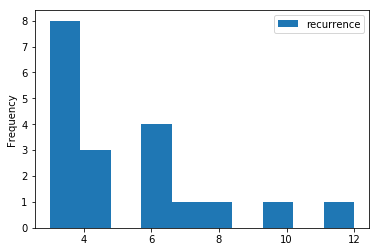

In [469]:
#Print the histogram with frequnce > 1

import matplotlib.pyplot as plt
country_list_recurrence_dataset[country_list_recurrence_dataset['recurrence'] > 2].plot(kind='hist')

plt.show()

In [470]:
#Repaling the non valube words for NaN and excluding then by dropnan()

replace_country = country_list_recurrence_dataset.replace('!!()', np.nan).replace('   ', np.nan).replace('  ', np.nan).replace('EXO•X1•ATEEZ•NCT', np.nan).replace('ประเทศไทย', np.nan)
replace_country.sort_values('recurrence', ascending=False)

,country,recurrence
249,bangladesh,12
10,"Lagos, Nigeria",10
5,"England, United Kingdom",8
22,Nigeria,7
2,India,6
37,"London, England",6
102,NaN,6
20,Republic of the Philippines,6
173,→,4
177,NaN,4


In [471]:
replace_country_2 = replace_country.replace('→', np.nan).replace('()', np.nan).replace('(*^^*)', np.nan).replace('→→', np.nan).dropna()
replace_country_2.sort_values('recurrence', ascending=False)


,country,recurrence
249,bangladesh,12
10,"Lagos, Nigeria",10
5,"England, United Kingdom",8
22,Nigeria,7
37,"London, England",6
20,Republic of the Philippines,6
2,India,6
334,"Accra, Ghana",3
130,"Florida, USA",3
88,London,3


In [472]:
replace_country_2.sort_values('recurrence', ascending=False).head(10)

,country,recurrence
249,bangladesh,12
10,"Lagos, Nigeria",10
5,"England, United Kingdom",8
22,Nigeria,7
37,"London, England",6
20,Republic of the Philippines,6
2,India,6
334,"Accra, Ghana",3
130,"Florida, USA",3
88,London,3


In [473]:
len(replace_country_2)

504

## 6.2 On this secction we are going to split the country names by ',' 
## to improve the precicion of the country account. 

In [474]:
# Creation the loop FOR to split all elements by ',' on the 'country' array

replace_country_split_1 = []
for i in replace_country_2['country']:
    A = str(i).split(',')
    print(A)
    replace_country_split_1.append(A)              


['India']
['North West', ' England']
['nn flora']
['England', ' United Kingdom']
['IBARAKI']
['Aberdeen', ' Scotland']
['Marvel DC']
['Lagos', ' Nigeria']
['Chiba', ' Japan']
['Susquehanna Valley ', 'USA']
['Raymond', ' ME']
['Amethi', ' India']
['100⃛']
['United States fl']
['35.963139', '-80.464812']
['USA']
['Cebu City', ' Philippines']
['Republic of the Philippines']
['Abuja', ' Nigeria']
['Nigeria']
['New Delhi', ' India']
['Mississippi']
['Virginia']
['GLAY']
['Belong to ELLA DAPE RIIP (NIT)']
['Stockport']
[' / ']
['Poinciana', ' FL']
['Portland', ' OR']
['United States']
['Ara varu teia']
['20:00 SHOWROOM']
[' D 10']
['Aiea', ' Hawaii']
['London', ' England']
['On the verge of Brexit']
['364712']
['Australia']
['SF']
['Rio de Janeiro', ' Brasil']
['The University of Oklahoma']
['&']
['Formia (LT)', ' Italy']
['Kyiv', ' Ukraine']
['LUCKNOW']
['🥂']
['Kosovo']
['Midrand', ' South Africa']
['A Estrada - Santiago']
['Taiwan']
['FA']
['An idea from another mans mind']
['Italia']
['Ba

In [475]:
replace_country_split_1 = pd.DataFrame(data=replace_country_split_1, columns=['CT1', 'CT2', 'CT3'])

In [476]:
replace_country_split_1.head()


,CT1,CT2,CT3
0,India,None,None
1,North West,England,None
2,nn flora,None,None
3,England,United Kingdom,None
4,IBARAKI,None,None


***
#### The next process is very important in order to correctly count countries by name. The extra spaces that can exist in the elements will cause a problem in the summing process, considering these elements as different from each other, even if the letters present are the same.
***

In [477]:
# Joining all lists and removing extra spaces

x = list(np.concatenate([replace_country_split_1['CT1'], replace_country_split_1['CT2'],replace_country_split_1['CT3']]))
E = []
for i in x:
    j = str(i).strip()
    jrp = j.replace('London','England').replace('Essex','England' )
   
    E.append(jrp)
E 

['India',
 'North West',
 'nn flora',
 'England',
 'IBARAKI',
 'Aberdeen',
 'Marvel DC',
 'Lagos',
 'Chiba',
 'Susquehanna Valley',
 'Raymond',
 'Amethi',
 '100⃛',
 'United States fl',
 '35.963139',
 'USA',
 'Cebu City',
 'Republic of the Philippines',
 'Abuja',
 'Nigeria',
 'New Delhi',
 'Mississippi',
 'Virginia',
 'GLAY',
 'Belong to ELLA DAPE RIIP (NIT)',
 'Stockport',
 '/',
 'Poinciana',
 'Portland',
 'United States',
 'Ara varu teia',
 '20:00 SHOWROOM',
 'D 10',
 'Aiea',
 'England',
 'On the verge of Brexit',
 '364712',
 'Australia',
 'SF',
 'Rio de Janeiro',
 'The University of Oklahoma',
 '&',
 'Formia (LT)',
 'Kyiv',
 'LUCKNOW',
 '🥂',
 'Kosovo',
 'Midrand',
 'A Estrada - Santiago',
 'Taiwan',
 'FA',
 'An idea from another mans mind',
 'Italia',
 'Baiona-Galicia',
 'East JHB',
 'BBHls',
 'Libis Hood 161',
 'Ambon',
 'North-west Frontier',
 'Ottawa',
 'nsfr',
 'Chorley',
 '+62',
 '58-3',
 'Elche',
 'Thailand',
 'DQ10FF14EC',
 '(3y4m) (6/2010m)',
 '‼\u200d',
 'Bexley',
 '--',
 'P

## 6.3 From this section, we are going to use the *collections.Count* to do a sum of the repeated country 

In [478]:
# Sum of repeated elements
# In this secction we will manipulated the dictionary 
country_split_recurrence = collections.Counter(E)

x_c_d = pd.DataFrame(list(country_split_recurrence.items()), columns=['country', 'recurrence'])

total_country_recurrence = x_c_d.replace('None', np.nan).dropna()
total_country_recurrence.sort_values('recurrence', ascending=False)

,country,recurrence
3,England,26
0,India,14
15,USA,10
19,Nigeria,10
395,UK,9
168,Scotland,5
247,Japan,4
218,South Africa,4
504,PA,4
548,MI,4


In [479]:
#https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p

# In this section, we select 'recurrence'> 2 and eliminate elements that do not represent the name of a country

country_recurrence_high_2 = total_country_recurrence[total_country_recurrence['recurrence']>2]
country_recurrence_high_3 = country_recurrence_high_2[~country_recurrence_high_2['country'].isin(['PA', 'MI', 'South Carolina', 'Florida'])]
country_recurrence_high_3


,country,recurrence
0,India,14
3,England,26
15,USA,10
19,Nigeria,10
117,Kenya,3
168,Scotland,5
218,South Africa,4
247,Japan,4
395,UK,9
485,Brasil,3


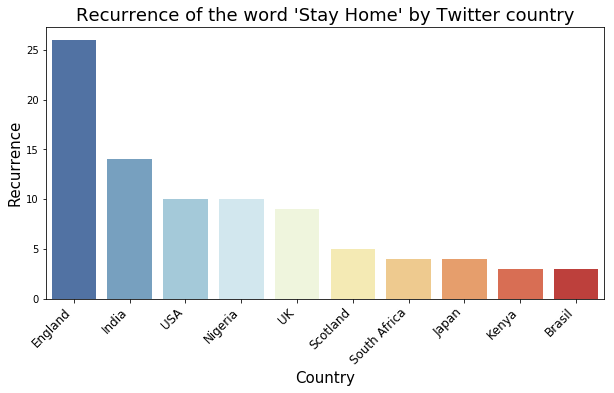

In [481]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data=country_recurrence_high_3.sort_values('recurrence', ascending=False), 
            x='country', y='recurrence', palette='RdYlBu_r')
plt.xticks(rotation=45, size=12, horizontalalignment='right')

plt.xlabel('Country', size=15)
plt.ylabel('Recurrence', size=15)
plt.title("Recurrence of the word 'Stay Home' by Twitter country", size=18)



plt.show()

# Conclusion
***

* By this approach was possible select tweets by a specific keywords ("satyhome" and "stay home")
* There are a mix of characteres and information on the "country" tweet secction
* To cleaning this information were excluded the non-alphanumeric vocabulary (Chinese, Arabic, and emoji)
* For the final analysis only countries with a recurrence count greater than 1 were selected in our dataset
* The recurrence of keywords by country was counted and expressed in a bar chart

In fact, we can not consider this data set representative for a comportamental analysis due to the small database size. However, we will not take this fault into consideration to be possible exercise the data analysis.

* by the fact, the "country" classification is not mandatory on the tweets we have a big number of missing values for this parameter in our dataset
* due to the facts mentioned above, there is also a large number of missing information in the "country" parameters, due to the presence of non-alphanumeric characters and classified by states instead of country. The state information was not take into consideration.The non-alphanumeric and empty classifications were transformed into NONE and excluded from the data set.

It was expected that the top 3 countries been representatives of native English speakers. England was the higher angaged country followed by the India ans USA;

However among the top 5 countries we have the UK (Unighted Kingdon), that represent all UK countries including the England. That can increase the England recurrence. Nevertheless on the bar chart we also have the Scotland representativite that is also part of the UK. So we can concluded the the UK is the higeh represetant of this keywords, becouse represent the sum of UK, Engand and Scotland recorence, and betwwen the UK countryes the England is the more representative.

As final conclusion, this was not the best methodology to extract the country information from the tweets. However, we were able to manage how to get way the information by exploring the data shape e applying the Python language tools to perform the tasks.
